<a href="https://colab.research.google.com/github/gunnar402/Simple-NN-Learn-Sine-Function/blob/main/Simple__NN_Example_sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Net
Net(
  (fc1): Linear(in_features=1, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=7, bias=True)
  (fc3): Linear(in_features=7, out_features=7, bias=True)
  (fc4): Linear(in_features=7, out_features=7, bias=True)
  (fc5): Linear(in_features=7, out_features=1, bias=True)
)
Epoch 0 - loss: 0.028465716168284416
Epoch 10 - loss: 0.0004935913602821529
Epoch 20 - loss: 0.012183045968413353
Epoch 30 - loss: 0.01996261440217495
Epoch 40 - loss: 0.015471049584448338
Epoch 50 - loss: 0.01014168281108141
Epoch 60 - loss: 0.005527789238840342
Epoch 70 - loss: 0.0025244150310754776
Epoch 80 - loss: 0.001074367668479681
Epoch 90 - loss: 0.0003974593710154295


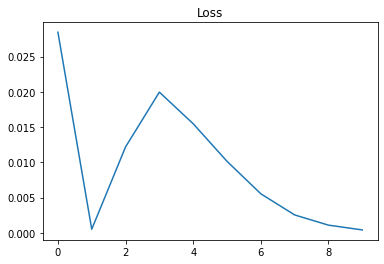

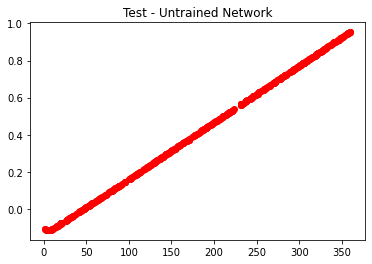

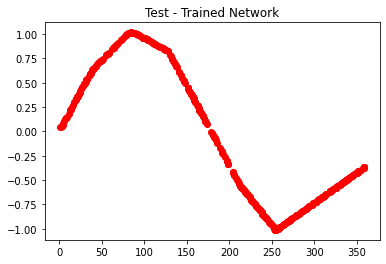

In [ ]:
# Importing libraries (PyTorch)
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# Defining NN (multi-layer w/ 1 input, 2 hidden, 1 output)
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(1, 7)
    self.fc2 = nn.Linear(7, 7)
    self.fc3 = nn.Linear(7, 7)
    self.fc4 = nn.Linear(7, 7)
    self.fc5 = nn.Linear(7, 1)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return x

net = Net()
print('Net')
print(net)

#print()
#print('Initial, Untrained Net Parameters (node weight, node bias)')
#print(list(net.parameters()))

# Create Random Number w/ PyTorch (tensor w 1 dimension)
import random as rd
import math as ma
test_sine_x_untrained = []
test_sine_y_untrained = []
for i in range(500):
  R_in = rd.randint(0, 359)
  test_sine_x_untrained.append(R_in)
  R_out_untrained = net(Variable(torch.Tensor([[[R_in]]])))
  test_sine_y_untrained.append(R_out_untrained)

input = Variable(torch.randn(1, 1, 1))
#print()
#print('Untrained NN Input')
#print(input)

net.zero_grad()
#print('Untrained NN Output')
out = net(input)

#print(out)
#print()

# Defining Loss Function (Least Squares)
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.4)
# Means square error
criterion = nn.MSELoss()


# Define Training Data Set

#data = [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36)]

# Angles and Sine
#import random as rd
#import math as ma
data = []
for j in range(1000):
  angle = rd.randint(0, 359)
  angle_rad = ma.radians(angle)
  sine = ma.sin(angle_rad)
  arr = (angle, sine)
  data.append(arr) 

#print(data)
#print()

# Network training
e_loss = []
for epoch in range(100):
  for i, data2 in enumerate(data):
    X, Y = iter(data2)
    X, Y = Variable(torch.FloatTensor([X]), requires_grad = True), Variable(torch.FloatTensor([Y]), requires_grad = False)
    optimizer.zero_grad()
    y_pred = net(X)
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()
  if (epoch % 10 == 0.0):
     e_loss.append(loss)
     print("Epoch {} - loss: {}".format(epoch, loss))

#print()
#print('Final, Trained Net Parameters (node weight, node bias)')
#print(list(net.parameters()))   


# Network Testing
test_sine_x = []
test_sine_y = []
for i in range(500):
  R_in = rd.randint(0, 359)
  test_sine_x.append(R_in)
  R_out = net(Variable(torch.Tensor([[[R_in]]])))
  test_sine_y.append(R_out)


#print()
#print('Prediction')
#R_in = 45
#print('1st Test Input')
#print(R_in)
#print('Predicted Out')
#print(net(Variable(torch.Tensor([[[R_in]]]))))

#print()
#print('Prediction 2')
#R_in_2 = 30
#print('2nd Test Input')
#print(R_in_2)
#print('Predicted Out')
#print(net(Variable(torch.Tensor([[[R_in_2]]]))))

# Plotting
import matplotlib.pyplot as plt 

# Loss 
plt.plot(e_loss)
plt.title('Loss')
plt.show()

# Test Data Untrained
plt.plot(test_sine_x_untrained, test_sine_y_untrained, 'ro')
plt.title('Test - Untrained Network')
plt.show()

# Test Data Trained
plt.plot(test_sine_x, test_sine_y, 'ro')
plt.title('Test - Trained Network')
plt.show()
